# Boston Airbnb Rental Prices

Three questions related to business or real-world applications of how the data could be used.

What features affect the rental price？ 
How Boston Airbnb Rental Prices related to seasons?
What's the predicted Boston Airbnb Rental Prices ?

## Business Understanding 
### Question 1. 
What features affect the rental price？

## Data Understanding

In [168]:
# Import library 
import pandas as pd
import numpy as np
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style

import seaborn as sns
sns.set_style('white')

In [86]:
import os 
# get the current working directory
cwd = os.getcwd()
print(cwd)

C:\Users\tiant\Desktop\Udacity_Data_Science\Boston Airbnb\Udacity_Project1


In [87]:
# Import data to dataframes
list = pd.read_csv('listings.csv')
print(list.info()) # check basic information  
# It includes basic information of Airbnb in Boston areas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [88]:
reviews = pd.read_csv('reviews.csv')
print(reviews.head())
reviews.info()

   listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 

In [89]:
calendar = pd.read_csv("calendar.csv")
print(calendar.head())
calendar.info()

   listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [90]:
# Copy the dataframe
list_clean = list.copy()
reviews_clean = reviews.copy()
calendar_clean = calendar.copy()

In [91]:
# In order to have better understanding which features are related to rental prices? 
# analysis the columns
col_list = list_clean.columns
print(col_list)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [92]:
print (list_clean["reviews_per_month"]) #check columns

0        NaN
1       1.30
2       0.47
3       1.00
4       2.25
        ... 
3580    0.34
3581     NaN
3582     NaN
3583    2.00
3584     NaN
Name: reviews_per_month, Length: 3585, dtype: float64


In [93]:
# First, let's drop some columns that are not useful for analysis (not related to the rental price, objects, url,)
cols = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary','thumbnail_url','medium_url','picture_url',
        'description', 'experiences_offered', 'neighborhood_overview',
       'host_id', 'host_url', 'host_name', 'host_location',
       'host_about',  'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
        'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_group_cleansed', 'market',
       'smart_location', 'is_location_exact', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
    'calculated_host_listings_count',
       'reviews_per_month','xl_picture_url']
list_clean.drop(cols, axis=1, inplace=True)

In [94]:
print(list_clean.info())
print(list_clean.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   space                             2528 non-null   object 
 2   notes                             1610 non-null   object 
 3   transit                           2295 non-null   object 
 4   access                            2096 non-null   object 
 5   interaction                       2031 non-null   object 
 6   house_rules                       2393 non-null   object 
 7   host_since                        3585 non-null   object 
 8   host_response_time                3114 non-null   object 
 9   host_response_rate                3114 non-null   object 
 10  host_acceptance_rate              3114 non-null   object 
 11  host_is_superhost                 3585 non-null   object 
 12  host_t

In [95]:
# drop the colunms with more than half of the missing value
cols = list_clean.columns[list_clean.isnull().sum()/list_clean.shape[0] > 0.5]
list_clean.drop(cols, axis=1, inplace=True)

In [96]:
print (list_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   space                             2528 non-null   object 
 2   transit                           2295 non-null   object 
 3   access                            2096 non-null   object 
 4   interaction                       2031 non-null   object 
 5   house_rules                       2393 non-null   object 
 6   host_since                        3585 non-null   object 
 7   host_response_time                3114 non-null   object 
 8   host_response_rate                3114 non-null   object 
 9   host_acceptance_rate              3114 non-null   object 
 10  host_is_superhost                 3585 non-null   object 
 11  host_thumbnail_url                3585 non-null   object 
 12  host_p

In [97]:
# Next, let's fix some datatype errors, extract numbers and change to int type
list_clean.info()
list_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   space                             2528 non-null   object 
 2   transit                           2295 non-null   object 
 3   access                            2096 non-null   object 
 4   interaction                       2031 non-null   object 
 5   house_rules                       2393 non-null   object 
 6   host_since                        3585 non-null   object 
 7   host_response_time                3114 non-null   object 
 8   host_response_rate                3114 non-null   object 
 9   host_acceptance_rate              3114 non-null   object 
 10  host_is_superhost                 3585 non-null   object 
 11  host_thumbnail_url                3585 non-null   object 
 12  host_p

,id,space,transit,access,interaction,house_rules,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,12147973,The house has an open and cozy feel at the sam...,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,2015-04-15,NaN,NaN,NaN,...,0,2016-09-06,0,NaN,NaN,NaN,NaN,moderate,f,f
1,3075044,Small but cozy and quite room with a full size...,Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2012-06-07,within an hour,100%,100%,...,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,moderate,f,f
2,6976,"Come stay with a friendly, middle-aged guy in ...","PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",2009-05-11,within a few hours,100%,88%,...,319,2016-09-06,41,2009-07-19,2016-08-05,98.0,10.0,moderate,t,f
3,1436513,Most places you find in Boston are small howev...,There are buses that stop right in front of th...,The basement has a washer dryer and gym area. ...,We do live in the house therefore might be som...,- The bathroom and house are shared so please ...,2013-04-21,within a few hours,100%,50%,...,98,2016-09-06,1,2016-08-28,2016-08-28,100.0,10.0,moderate,f,f
4,7651065,"Clean, attractive, private room, one block fro...",From Logan Airport and South Station you have...,You will have access to the front and side por...,I love my city and really enjoy sharing it wit...,"Please no smoking in the house, porch or on th...",2014-05-11,within an hour,100%,100%,...,334,2016-09-06,29,2015-08-18,2016-09-01,99.0,10.0,flexible,f,f


In [98]:
# Convert price from object to integer  
# Convert to string and extract the integer using regular expressions.
list_clean['price']=list_clean['price'].str.extract('(\d+)').astype(int)

In [99]:
print(list_clean['price'])

0       250
1        65
2        65
3        75
4        79
       ... 
3580     69
3581    150
3582    198
3583     65
3584     65
Name: price, Length: 3585, dtype: int32


In [101]:
# Convert cleaning_fee from object to float  
list_clean['cleaning_fee']=list_clean['cleaning_fee'].str.extract('(\d+)').astype(float)

AttributeError: Can only use .str accessor with string values!

In [102]:
print(list_clean['cleaning_fee'])

0       35.0
1       10.0
2        NaN
3       50.0
4       15.0
        ... 
3580     NaN
3581    15.0
3582     NaN
3583     NaN
3584    25.0
Name: cleaning_fee, Length: 3585, dtype: float64


In [103]:
# Convert extra_people from object to float  
list_clean["extra_people"]=list_clean['extra_people'].str.extract('(\d+)').astype(float)
print(list_clean['extra_people'])

0        0.0
1        0.0
2       20.0
3       25.0
4        0.0
        ... 
3580    24.0
3581     0.0
3582     0.0
3583    30.0
3584    30.0
Name: extra_people, Length: 3585, dtype: float64


In [104]:
# Convert zipcode from object to float  
list_clean["zipcode"]=list_clean['zipcode'].str.extract('(\d+)').astype(float)
print(list_clean['zipcode'])

0       2131.0
1       2131.0
2       2131.0
3          NaN
4       2131.0
         ...  
3580    2143.0
3581    2446.0
3582    2141.0
3583    2145.0
3584    2145.0
Name: zipcode, Length: 3585, dtype: float64


In [105]:
# Change datatype for host_since
list_clean['host_since'] = pd.to_datetime(list_clean.host_since)
print(list_clean['host_since'])

0      2015-04-15
1      2012-06-07
2      2009-05-11
3      2013-04-21
4      2014-05-11
          ...    
3580   2014-07-31
3581   2015-07-02
3582   2014-01-14
3583   2016-05-27
3584   2015-08-20
Name: host_since, Length: 3585, dtype: datetime64[ns]


In [106]:
# select subste of datalist with "int" and "float",it has been selected to explore person's correlation
df_num = list_clean.select_dtypes(include=['int64','int32','float64'])
df_num.head()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3585 non-null   int64  
 1   zipcode                 3547 non-null   float64
 2   latitude                3585 non-null   float64
 3   longitude               3585 non-null   float64
 4   accommodates            3585 non-null   int64  
 5   bathrooms               3571 non-null   float64
 6   bedrooms                3575 non-null   float64
 7   beds                    3576 non-null   float64
 8   price                   3585 non-null   int32  
 9   cleaning_fee            2478 non-null   float64
 10  guests_included         3585 non-null   int64  
 11  extra_people            3585 non-null   float64
 12  minimum_nights          3585 non-null   int64  
 13  maximum_nights          3585 non-null   int64  
 14  availability_30         3585 non-null   

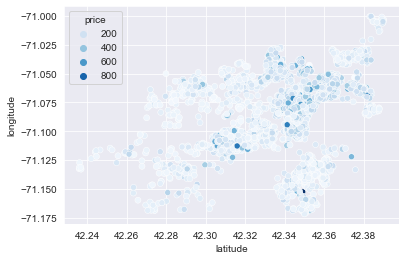

In [116]:
# use scatterplot to explore the location
Price_La_Lo = sns.scatterplot(data = list_clean, x = "latitude", y ="longitude",hue = "price", palette ="Blues")

In [ ]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)
plt.savefig('Price_La_Lo.png',dpi=300)

 we can see there is no clear relationship bewteen price and locations 

C:\Users\tiant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


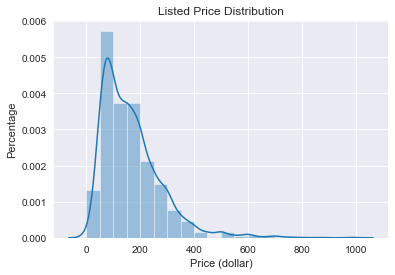

In [117]:
# visualizae the price
sns.distplot(df_num['price'], bins=20, kde=True)
plt.ylabel('Percentage', fontsize=11)
plt.xlabel('Price (dollar)', fontsize=11)
plt.title('Listed Price Distribution', fontsize=12);
plt.savefig('visualizae the price.png',dpi=300)

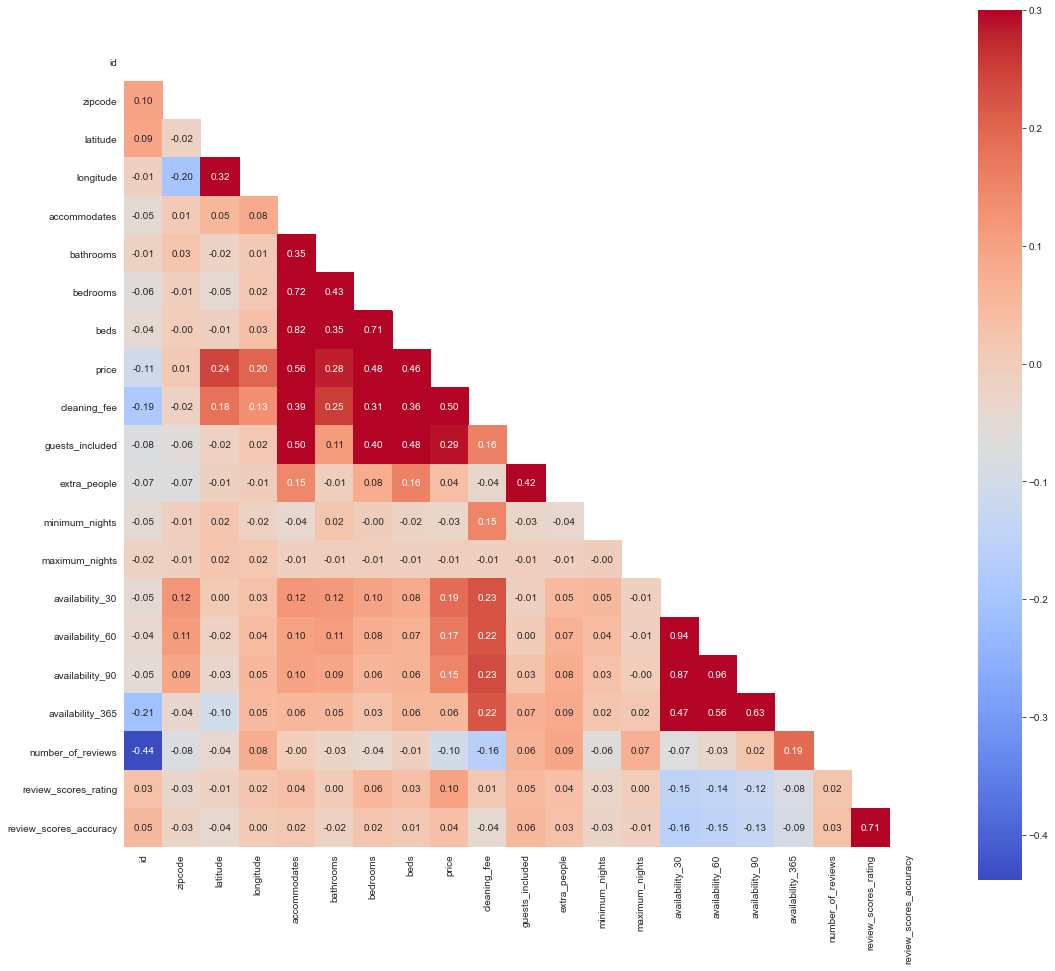

In [118]:
# visualize the correlation matrix
corr = df_num.corr()
mask = np.zeros_like(corr) #Use a mask to plot only part of a matrix
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 16))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.savefig('correlation matrix.png',dpi=300)   

Based on the numerical data,the price is highly related to the number of accommodates, bedrooms, beds, cleanning_fee, and guests_included

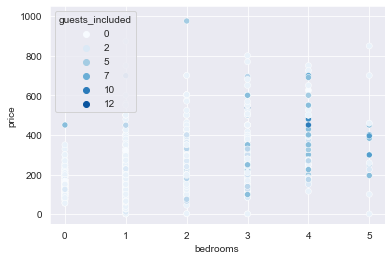

In [119]:
price_list = df_num.groupby(['bedrooms','bathrooms']).mean()['price']
sns.scatterplot(data = df_num, x = "bedrooms", y ="price",hue ='guests_included', palette ="Blues")
plt.savefig('price_bedrooms_bathrooms.png',dpi=300)   

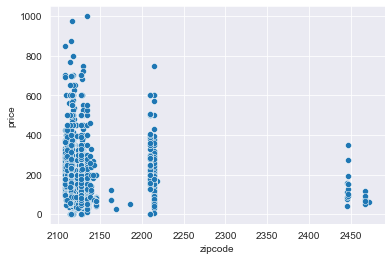

In [120]:
sns.scatterplot(data = df_num, x = "zipcode", y ="price", palette ="Blues")
plt.savefig('price_zipcode.png',dpi=300)   

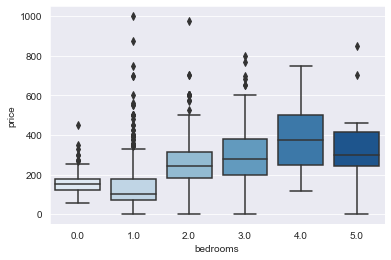

In [121]:
sns.boxplot(x = "bedrooms", y ="price", data = df_num, palette ="Blues")
plt.savefig('price_bedrooms.png',dpi=300)   

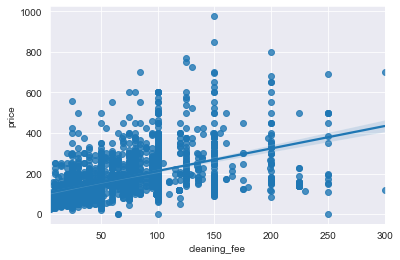

In [122]:
sns.regplot(x = "cleaning_fee", y ="price", data = df_num) 
plt.savefig('price_cleaning_fee.png',dpi=300)   

In [123]:
# Now start to work with "object" 
df_cat = list_clean.select_dtypes(include=['object']) # subset dataframe 
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   space                             2528 non-null   object
 1   transit                           2295 non-null   object
 2   access                            2096 non-null   object
 3   interaction                       2031 non-null   object
 4   house_rules                       2393 non-null   object
 5   host_response_time                3114 non-null   object
 6   host_response_rate                3114 non-null   object
 7   host_acceptance_rate              3114 non-null   object
 8   host_is_superhost                 3585 non-null   object
 9   host_thumbnail_url                3585 non-null   object
 10  host_picture_url                  3585 non-null   object
 11  host_has_profile_pic              3585 non-null   object
 12  neighbourhood_cleans

In [124]:
df_cat.head()

,space,transit,access,interaction,house_rules,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,...,room_type,bed_type,amenities,calendar_updated,calendar_last_scraped,first_review,last_review,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,The house has an open and cozy feel at the sam...,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,...,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",2 weeks ago,2016-09-06,NaN,NaN,moderate,f,f
1,Small but cozy and quite room with a full size...,Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,...,Private room,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",a week ago,2016-09-06,2014-06-01,2016-08-13,moderate,f,f
2,"Come stay with a friendly, middle-aged guy in ...","PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",within a few hours,100%,88%,t,https://a2.muscache.com/im/users/16701/profile...,...,Private room,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",5 days ago,2016-09-06,2009-07-19,2016-08-05,moderate,t,f
3,Most places you find in Boston are small howev...,There are buses that stop right in front of th...,The basement has a washer dryer and gym area. ...,We do live in the house therefore might be som...,- The bathroom and house are shared so please ...,within a few hours,100%,50%,f,https://a2.muscache.com/im/pictures/5d430cde-7...,...,Private room,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",a week ago,2016-09-06,2016-08-28,2016-08-28,moderate,f,f
4,"Clean, attractive, private room, one block fro...",From Logan Airport and South Station you have...,You will have access to the front and side por...,I love my city and really enjoy sharing it wit...,"Please no smoking in the house, porch or on th...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/15396970/prof...,...,Private room,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",2 weeks ago,2016-09-06,2015-08-18,2016-09-01,flexible,f,f


In [125]:
# Take a quick look about the specific columns and their relationship with price

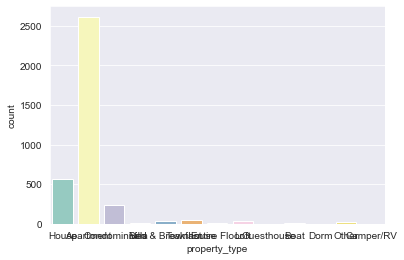

In [132]:
sns.countplot(x='property_type', data=df_cat,palette="Set3")
plt.savefig('property_type.png',dpi=300)     

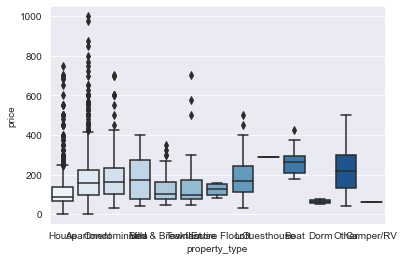

In [131]:
sns.boxplot(x = "property_type", y ="price", data = list_clean, palette ="Blues")
plt.savefig('price_property_type.png',dpi=300)   

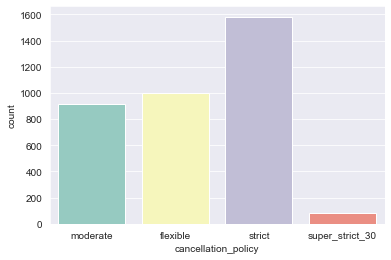

In [133]:
sns.countplot(x='cancellation_policy', data=df_cat,palette="Set3")
plt.savefig('cancellation_policy.png',dpi=300)     

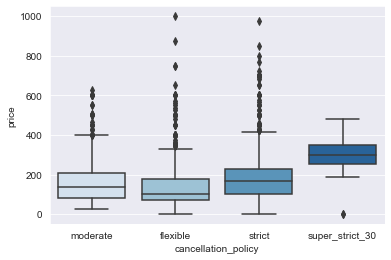

In [134]:
sns.boxplot(x = "cancellation_policy", y ="price", data = list_clean, palette ="Blues")
plt.savefig('price_cancellation_policy.png',dpi=300)     

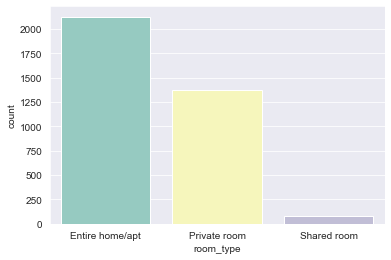

In [135]:
sns.countplot(x='room_type', data=df_cat,palette="Set3")
plt.savefig('room_type.png',dpi=300)     

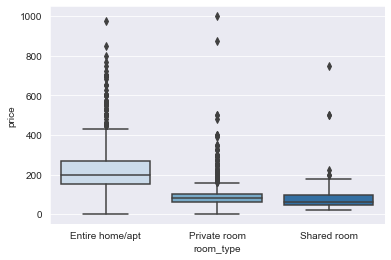

In [136]:
sns.boxplot(x = "room_type", y ="price", data = list_clean, palette ="Blues")
plt.savefig('price_room_type.png',dpi=300)     

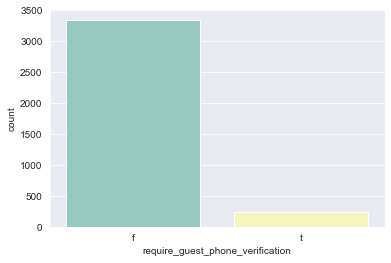

In [138]:
sns.countplot(x='require_guest_phone_verification', data=df_cat, palette="Set3")  
plt.savefig('require_guest_phone_verification.png',dpi=300)     

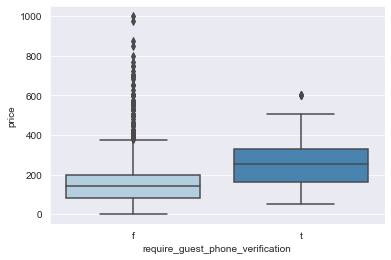

In [139]:
sns.boxplot(x = "require_guest_phone_verification", y ="price", data = list_clean, palette ="Blues")
plt.savefig('price_require_guest_phone_verification.png',dpi=300)     

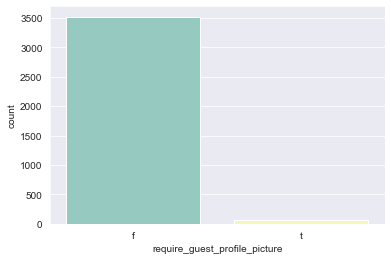

In [140]:
sns.countplot(x='require_guest_profile_picture', data=df_cat,palette="Set3")   
plt.savefig('require_guest_profile_picture.png',dpi=300)     

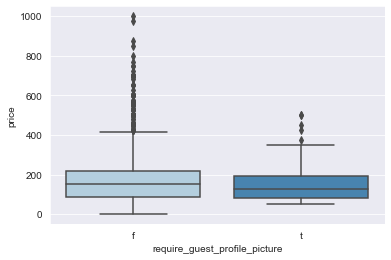

In [141]:
sns.boxplot(x = "require_guest_profile_picture", y ="price", data = list_clean, palette ="Blues")
plt.savefig('price_require_guest_profile_picture.png',dpi=300)     

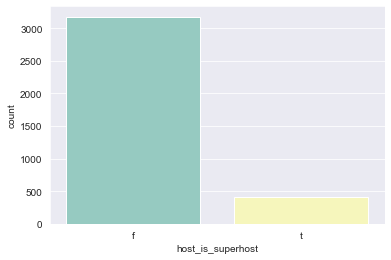

In [142]:
sns.countplot(x='host_is_superhost', data=df_cat,palette="Set3")   
plt.savefig('host_is_superhost.png',dpi=300)     

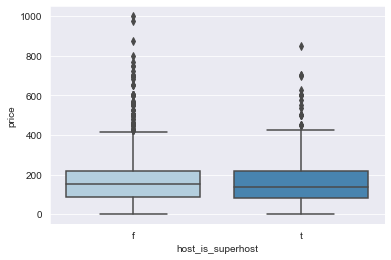

In [143]:
sns.boxplot(x = "host_is_superhost", y ="price", data = list_clean, palette ="Blues")
plt.savefig('price_host_is_superhost.png',dpi=300)     

require_guest_phone_verification, room_type，cancellation_policy are affect the price 

## Question 2.

What's the predicted rental price ?

In [144]:
# mutiple linear regression will be used to predict price
y = list_clean['price']

In [145]:
# Base on previous exploration, 
# the number of accommodates, bedrooms, beds, cleanning_fee, and guess_included, 
# require_guest_phone_verification, room_type，cancellation_policy, 
# are affect the price 

<AxesSubplot:>

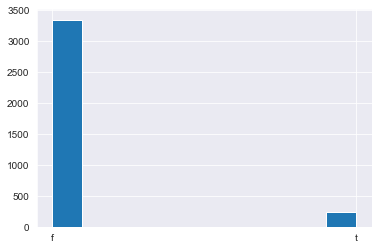

In [146]:
# Dummy variables for Categorical Values
list_clean['require_guest_phone_verification'].hist()

In [147]:
list_clean['require_guest_phone_verification'] = pd.get_dummies(list_clean['require_guest_phone_verification']) # code F as 1; code t as 0

In [148]:
print(list_clean['require_guest_phone_verification'])

0       1
1       1
2       1
3       1
4       1
       ..
3580    1
3581    1
3582    1
3583    1
3584    1
Name: require_guest_phone_verification, Length: 3585, dtype: uint8


<AxesSubplot:>

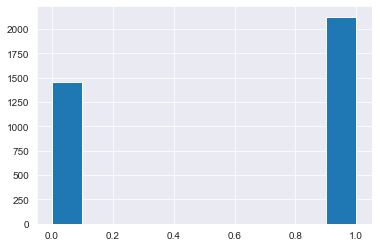

In [149]:
list_clean['room_type'] = pd.get_dummies(list_clean['room_type']) 
list_clean['room_type'].hist()

<AxesSubplot:>

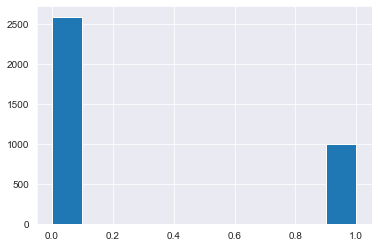

In [150]:
list_clean['cancellation_policy'] = pd.get_dummies(list_clean['cancellation_policy']) 
list_clean['cancellation_policy'].hist()

In [151]:
# Then, make a prediction using mutiple linear regression
# parameters:
# numerical data, accommodates, bedrooms, beds, cleanning_fee, and guess_included
# Categorical data, require_guest_phone_verification, room_type，cancellation_policy, 

Prepare for traning data

Supervised ML process: 
			§ Instantiate 
			§ Fit the model using training data
			§ Predict the results based on fitted model
			§ Score



In [152]:
list_clean["guests_included"]

0       1
1       0
2       1
3       2
4       1
       ..
3580    1
3581    1
3582    1
3583    1
3584    1
Name: guests_included, Length: 3585, dtype: int64

In [153]:
# Prepare for traning data
# only set the quantitative vars
varables = list_clean[['accommodates', 'bedrooms', 'beds', 'cleaning_fee','guests_included',
                       'require_guest_phone_verification','room_type','cancellation_policy',
                       'price']]

# remove all nan value
all_va = varables.dropna()

X = all_va[['accommodates', 'bedrooms', 'beds', 'cleaning_fee','guests_included',
                       'require_guest_phone_verification','room_type','cancellation_policy',]]
y = all_va['price'] 

# Split data into training and test data, and fit a linear model
from sklearn.model_selection import train_test_split
# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=32)

In [154]:
#Four steps:  Supervised ML process: 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Instantiate
lm_model = LinearRegression(normalize=True)
#Fit - why does this break?
lm_model.fit(X_train, y_train) 
#Predict
y_test_preds =lm_model.predict(X_test)
#Score
r_test = r2_score(y_test, y_test_preds) # Rsquared here
print("Rsquared in test dataset: "+ str(r_test) )


Rsquared in test dataset: 0.48056345401768297


In [155]:
#or Use cross validation  
from sklearn.model_selection  import cross_val_score 

#Instantiate
lm_model = LinearRegression(normalize=True)
#Fit,Predict,Score
scores = cross_val_score(lm_model, X, y, cv =5, scoring= "r2"  )
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.49 accuracy with a standard deviation of 0.09


## Question 3.
How rental price is related to seasons ? 

In [156]:
rew_cal.info()
rew_cal.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920375 entries, 0 to 24920374
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date_x         object
 3   reviewer_id    int64 
 4   reviewer_name  object
 5   comments       object
 6   date_y         object
 7   available      object
 8   price          object
dtypes: int64(3), object(6)
memory usage: 1.9+ GB


,listing_id,id,date_x,reviewer_id,reviewer_name,comments,date_y,available,price
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,2017-08-31,t,$95.00
1,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,2017-08-30,t,$95.00
2,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,2017-08-29,t,$95.00
3,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,2017-08-28,t,$95.00
4,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,2017-08-27,t,$95.00


In [157]:
# To explore the relationship between date and price, calendar dataset is necessary
calendar = pd.read_csv("calendar.csv")
print(calendar.head())
calendar.info()

   listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [158]:
data_price = calendar[['date','price',"available"]]
data_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   date       1308890 non-null  object
 1   price      643037 non-null   object
 2   available  1308890 non-null  object
dtypes: object(3)
memory usage: 30.0+ MB


In [159]:
data_price = data_price.dropna()
data_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       643037 non-null  object
 1   price      643037 non-null  object
 2   available  643037 non-null  object
dtypes: object(3)
memory usage: 19.6+ MB


In [160]:
data_price['date'] = pd.to_datetime(data_price['date'])

In [161]:
#convert to string and extract the integer using regular expressions.
data_price['price']=data_price['price'].str.extract('(\d+)').astype(int)

<AxesSubplot:>

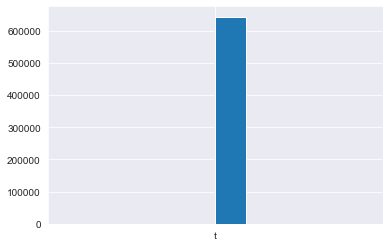

In [162]:
data_price['available'].hist()

In [163]:
from pandas import read_csv
from matplotlib import pyplot

data_price["date"].head()

365   2017-08-22
366   2017-08-21
367   2017-08-20
368   2017-08-19
369   2017-08-18
Name: date, dtype: datetime64[ns]

In [164]:
from pandas import Grouper
date_group= data_price.groupby(pd.Grouper(key="date", freq="M")).mean() # groupby date by Momth
print(date_group)

                 price
date                  
2016-09-30  248.775501
2016-10-31  230.267559
2016-11-30  199.200482
2016-12-31  187.961916
2017-01-31  178.363717
2017-02-28  175.862295
2017-03-31  175.933818
2017-04-30  187.187614
2017-05-31  184.174272
2017-06-30  189.999185
2017-07-31  193.216145
2017-08-31  190.210597
2017-09-30  184.736023


<AxesSubplot:xlabel='date'>

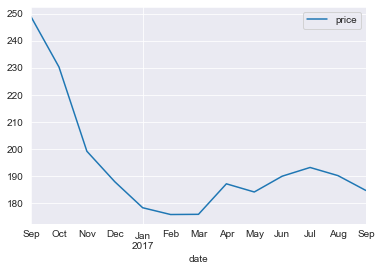

In [165]:
date_group.plot()

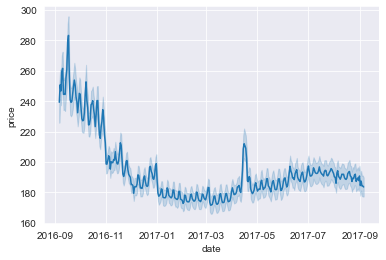

In [167]:
import seaborn as sns
sns.lineplot(x="date", y="price",
             data=data_price)
plt.savefig('price_data.png',dpi=300)     

The rental price is decreased from 240 to 180 